In [15]:
#Import all relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules



In [16]:
#Load the file into pandas 
df = pd.read_csv("Online_Retail.csv")
#Check the first 5 rows of the dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [17]:
#Check the structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299999 entries, 0 to 299998
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    299999 non-null  object 
 1   StockCode    299999 non-null  object 
 2   Description  298890 non-null  object 
 3   Quantity     299999 non-null  int64  
 4   InvoiceDate  299999 non-null  object 
 5   UnitPrice    299999 non-null  float64
 6   CustomerID   215906 non-null  float64
 7   Country      299999 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 18.3+ MB


In [18]:
#Check the occurrence of null values
df.isna().sum()

InvoiceNo          0
StockCode          0
Description     1109
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     84093
Country            0
dtype: int64

In [19]:
#Drop all rows with a null value
df.dropna(inplace=True)
len(df)

215906

In [20]:
# نحول عمود الفواتير "InvoiceNo" إلى نوع نصي عشان نتعامل معه كـ string بدل ما يكون أرقام
df["InvoiceNo"] = df["InvoiceNo"].astype('str')

# نشيل الصفوف اللي تحتوي على فواتير فيها حرف "C" لأنها غالباً تمثل فواتير إلغاء
df = df[~df["InvoiceNo"].str.contains("C")]

# نعرض عدد الصفوف بعد تنظيف البيانات للتأكد من عدد المعاملات المتبقية
len(df)


210715

In [21]:
# نشوف توزيع المعاملات حسب الدولة ونجيب أعلى 10 دول من حيث عدد المعاملات
top10 = df["Country"].value_counts().head(10)

# نعرض النتائج عشان نشوف توزيع الدول
top10


Country
United Kingdom    186802
Germany             5060
France              4130
EIRE                3740
Netherlands         1484
Spain               1352
Belgium             1154
Switzerland         1083
Australia            829
Portugal             699
Name: count, dtype: int64

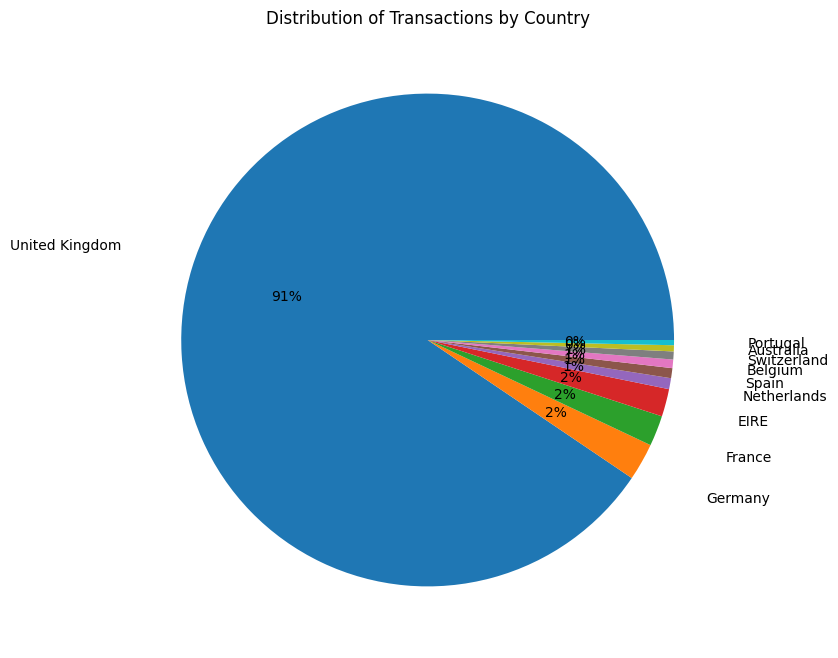

In [22]:
# إنشاء مخطط دائري لإظهار توزيع المعاملات حسب أعلى 10 دول
plt.figure(figsize=[8, 8])

# نستخدم دالة pie لإنشاء المخطط الدائري
# "labels=top10.index" لعرض أسماء الدول في المخطط
# "autopct='%0.0f%%'" لإظهار النسبة المئوية لكل دولة
# "labeldistance=1.3" للتحكم في بُعد الأسماء عن مركز المخطط
plt.pie(top10, labels=top10.index, autopct='%0.0f%%', labeldistance=1.3)

# إضافة عنوان للمخطط
plt.title("Distribution of Transactions by Country")

# عرض المخطط
plt.show()


In [23]:
# نجمع البيانات لفواتير دولة "United Kingdom" فقط
# نستخدم groupby لتجميع البيانات حسب "InvoiceNo" و "Description" ثم نجمع الكميات باستخدام sum
# بعد كذا نستخدم unstack لإعادة تشكيل البيانات بحيث يكون كل منتج عمود لوحده
# reset_index عشان نعيد تعيين الفهرس
# fillna(0) عشان نعبي القيم الفارغة بـ 0 (أي منتجات لم يتم شراؤها)
# أخيراً، نعيّن "InvoiceNo" كفهرس لإطار البيانات
basket = df[df['Country'] == "United Kingdom"] \
        .groupby(['InvoiceNo', 'Description'])["Quantity"] \
        .sum().unstack() \
        .reset_index().fillna(0) \
        .set_index("InvoiceNo")

# نعرض أول خمس صفوف للتأكد من الشكل النهائي للبيانات
basket.head()


Description,4 PURPLE FLOCK DINNER CANDLES,DOLLY GIRL BEAKER,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# ننشئ دالة اسمها encode_values لترميز القيم باستخدام التشفير الأحادي (One-Hot Encoding)
# لو كانت القيمة أقل أو تساوي 0، نخليها 0
# لو كانت القيمة أكبر أو تساوي 1، نخليها 1
def encode_values(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

# نطبق الدالة على البيانات باستخدام applymap لتطبيق الدالة على كل عنصر داخل DataFrame
basket_encoded = basket.applymap(encode_values)

# نعرض البيانات بعد التشفير للتأكد من النتيجة
basket_encoded


/tmp/ipykernel_12092/2614825591.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(encode_values)


Description,4 PURPLE FLOCK DINNER CANDLES,DOLLY GIRL BEAKER,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
563182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
563183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# نصفي الفواتير بحيث نحتفظ فقط بالفواتير اللي تحتوي على عنصرين أو أكثر
# نستخدم (basket_encoded > 0).sum(axis=1) >= 2 لتحديد الفواتير اللي فيها أكثر من عنصر
basket_filtered = basket_encoded[(basket_encoded > 0).sum(axis=1) >= 2]

# نعرض البيانات بعد التصفية للتأكد من النتيجة
basket_filtered


Description,4 PURPLE FLOCK DINNER CANDLES,DOLLY GIRL BEAKER,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
563182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
563183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# ننشئ مجموعات العناصر المتكررة باستخدام خوارزمية apriori
# نحدد "min_support=0.03" كحد أدنى للدعم لإظهار المجموعات اللي تتكرر بنسبة 3% أو أكثر
# ونستخدم "use_colnames=True" عشان يظهر أسماء الأعمدة بدل من الأرقام
# نرتب النتائج حسب عمود الدعم "support" بترتيب تنازلي
frequent_itemsets = apriori(basket_filtered, min_support=0.03, use_colnames=True).sort_values("support", ascending=False)

# نعرض أول 10 مجموعات عشان نشوف أكثر العناصر المتكررة
frequent_itemsets.head(10)


/usr/local/python/3.12.1/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
98,0.143987,(WHITE HANGING HEART T-LIGHT HOLDER)
79,0.107708,(REGENCY CAKESTAND 3 TIER)
71,0.106126,(PARTY BUNTING)
44,0.092337,(JUMBO BAG RED RETROSPOT)
5,0.085895,(ASSORTED COLOUR BIRD ORNAMENT)
57,0.079792,(LUNCH BAG RED RETROSPOT)
84,0.068716,(SET OF 3 CAKE TINS PANTRY DESIGN )
63,0.067586,(NATURAL SLATE HEART CHALKBOARD )
50,0.066682,(LUNCH BAG BLACK SKULL.)
32,0.064534,(HEART OF WICKER SMALL)


In [14]:
# نطبق قواعد الارتباط على مجموعات العناصر المتكررة اللي استخرجناها
# نحدد "metric='lift'" لقياس مدى قوة القاعدة بناءً على قيمة الرفع
# نحدد "min_threshold=1" كحد أدنى لقيمة الرفع حتى نضمن قوة القاعدة
# نرتب النتائج حسب قيمة الرفع "lift" بترتيب تنازلي ونعيد تعيين الفهرس
assoc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift", ascending=False).reset_index(drop=True)

# نعرض قواعد الارتباط للتأكد من النتيجة
assoc_rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.051085,0.046564,0.036958,0.723451,15.536644,0.034579,3.447624,0.986006
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.046564,0.051085,0.036958,0.793689,15.536644,0.034579,4.599447,0.981331
2,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.064534,0.053910,0.031646,0.490368,9.095962,0.028166,1.856416,0.951463
3,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.053910,0.064534,0.031646,0.587002,9.095962,0.028166,2.265061,0.940779
4,(LUNCH BAG PINK POLKADOT),(LUNCH BAG BLACK SKULL.),0.062048,0.066682,0.031533,0.508197,7.621228,0.027395,1.897747,0.926260
5,(LUNCH BAG BLACK SKULL.),(LUNCH BAG PINK POLKADOT),0.066682,0.062048,0.031533,0.472881,7.621228,0.027395,1.779395,0.930859
6,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.062048,0.079792,0.033680,0.542805,6.802747,0.028729,2.012726,0.909429
7,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.079792,0.062048,0.033680,0.422096,6.802747,0.028729,1.623025,0.926965
8,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.055606,0.092337,0.034697,0.623984,6.757660,0.029563,2.413892,0.902187
9,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.092337,0.055606,0.034697,0.375765,6.757660,0.029563,1.512882,0.938696
